## Supervised Learning - Classification

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from sklearn import svm, datasets
import matplotlib.pyplot as plt

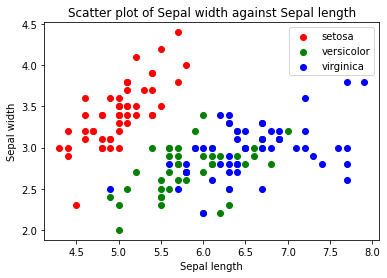

In [3]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# ---plot the point---
colors = ['red', 'green', 'blue']
for color, i , target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

(array([0, 1, 2]), array([50, 74, 26], dtype=int64))

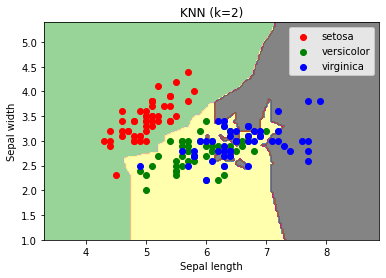

In [4]:
from sklearn.neighbors import KNeighborsClassifier

def plotknn(X, y, k):
    
    #---instantiate learning model---
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #---fitting the model---
    knn.fit(X, y)
    
    #---min and max for the first feature---
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    #---min and max for the second feature---
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    #---step size in the mesh---
    h = (x_max / x_min)/100
    
    #---make predictions for each of the points in xx,yy---
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #---draw the result using a color plot---
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
    
    #---plot the training points---
    colors = ['red', 'green', 'blue']
    for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f'KNN (k={k})')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    
    predictions = knn.predict(X)
    #--classifications based on predictions---
    return np.unique(predictions, return_counts=True)

plotknn(X, y, 2)